<a href="https://colab.research.google.com/github/ganeshmukhiya/Topic-Modeling-NMF/blob/main/sparsity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Sparsity before NMF: 0.9996
Sparsity of W (Document-Topic matrix): 0.4986
Sparsity of H (Topic-Term matrix): 0.6787


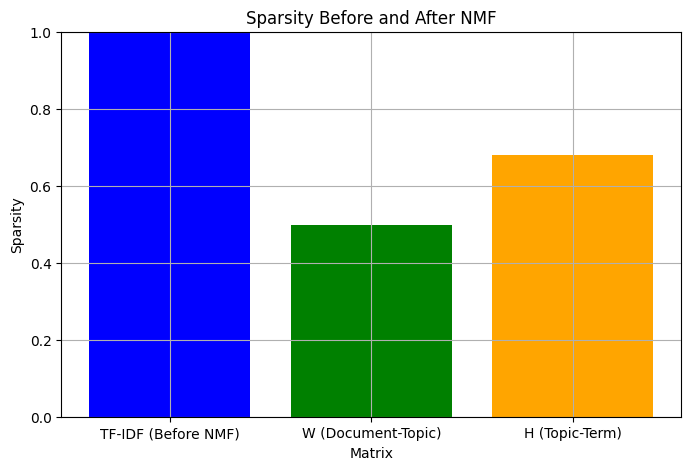

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

# 1. Fetch the data
newsgroups = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))
documents = newsgroups.data

# 2. Apply TF-IDF vectorization
vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_df=0.95, min_df=2, stop_words='english')
X_tfidf = vectorizer.fit_transform(documents)

# 3. Calculate sparsity before NMF (in the original TF-IDF matrix)
def calculate_sparsity(matrix):
    total_elements = matrix.shape[0] * matrix.shape[1]
    zero_elements = total_elements - matrix.count_nonzero()  # For sparse matrices
    sparsity = zero_elements / total_elements
    return sparsity

sparsity_before = calculate_sparsity(X_tfidf)
print(f"Sparsity before NMF: {sparsity_before:.4f}")

# 4. Apply NMF for topic modeling
num_topics = 10
nmf_model = NMF(n_components=num_topics, random_state=42)
W = nmf_model.fit_transform(X_tfidf)  # Document-Topic matrix
H = nmf_model.components_             # Topic-Term matrix

# 5. Calculate sparsity after NMF (for dense matrices, use np.count_nonzero)
def calculate_sparsity_dense(matrix):
    total_elements = matrix.size  # Total number of elements in the dense matrix
    zero_elements = total_elements - np.count_nonzero(matrix)  # Use numpy's count_nonzero for dense matrices
    sparsity = zero_elements / total_elements
    return sparsity

sparsity_W = calculate_sparsity_dense(W)
sparsity_H = calculate_sparsity_dense(H)

print(f"Sparsity of W (Document-Topic matrix): {sparsity_W:.4f}")
print(f"Sparsity of H (Topic-Term matrix): {sparsity_H:.4f}")

# 6. Visualize the sparsity before and after NMF
sparsity_values = [sparsity_before, sparsity_W, sparsity_H]
labels = ['TF-IDF (Before NMF)', 'W (Document-Topic)', 'H (Topic-Term)']

# Create a bar plot
plt.figure(figsize=(8, 5))
plt.bar(labels, sparsity_values, color=['blue', 'green', 'orange'])
plt.title('Sparsity Before and After NMF')
plt.xlabel('Matrix')
plt.ylabel('Sparsity')
plt.ylim(0, 1)  # Sparsity is a ratio, so it ranges from 0 to 1
plt.grid(True)

# Show the plot
plt.show()
